In [15]:
#importing useful libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten
from keras.preprocessing import image
import cv2
from keras.utils import np_utils
from sklearn.utils import shuffle
import glob
import pandas as pd
import os
import csv

In [2]:
#importing dataset and dividing them in training and testing data
train_set=pd.read_csv('.\\digit-recognizer\\train.csv')
test_set=pd.read_csv('.\\digit-recognizer\\test.csv')
Y=train_set['label']
X=train_set.drop(columns='label')
X=np.array(X).reshape(-1,28,28)
Y=np.array(Y).reshape(-1,1)

In [3]:
Y[0]

array([1], dtype=int64)

[1]


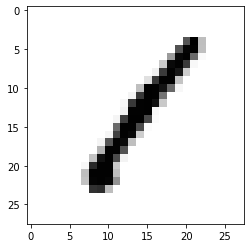

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 0 # You may select anything up to 42,000
print(Y[image_index]) # The label is 1
plt.imshow(X[image_index], cmap='Greys')

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,Y,test_size=0.3,random_state=0)

In [6]:
X_cv.shape

(12600, 28, 28)

In [7]:
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_cv=np_utils.to_categorical(y_cv,num_classes=10)

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_cv = X_cv.reshape(X_cv.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_cv = X_cv.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_cv /= 255
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_cv.shape[0])

x_train shape: (29400, 28, 28, 1)
Number of images in x_train 29400
Number of images in x_test 12600


In [9]:
# creating the model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 16)        

In [10]:
model.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [11]:
model.fit(x=X_train,y=y_train,batch_size=125,epochs=20,validation_data=(X_cv,y_cv))


Train on 29400 samples, validate on 12600 samples
Epoch 1/20
29400/29400 [==============================] - 25s 846us/step - loss: 0.6909 - accuracy: 0.7737 - val_loss: 0.1564 - val_accuracy: 0.9551
Epoch 2/20
29400/29400 [==============================] - 8s 278us/step - loss: 0.2204 - accuracy: 0.9316 - val_loss: 0.0977 - val_accuracy: 0.9704
Epoch 3/20
29400/29400 [==============================] - 8s 279us/step - loss: 0.1533 - accuracy: 0.9549 - val_loss: 0.0822 - val_accuracy: 0.9747
Epoch 4/20
29400/29400 [==============================] - 8s 276us/step - loss: 0.1232 - accuracy: 0.9617 - val_loss: 0.0590 - val_accuracy: 0.9798
Epoch 5/20
29400/29400 [==============================] - 8s 276us/step - loss: 0.1044 - accuracy: 0.9691 - val_loss: 0.0560 - val_accuracy: 0.9820
Epoch 6/20
29400/29400 [==============================] - 8s 276us/step - loss: 0.0898 - accuracy: 0.9739 - val_loss: 0.0695 - val_accuracy: 0.9782
Epoch 7/20
29400/29400 [==============================] - 8s

In [12]:
from keras.models import model_from_json
model_json = model.to_json()
with open("mnist_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mnist_weights.h5")
print("Saved model to disk")

Saved model to disk


In [16]:
#list storing all the prediction for test dataset
all_predictions=[]
X_test=np.array(test_set).reshape(-1,28,28)
for i in range(0,28000):
  predictions=model.predict(X_test[i].reshape(1,28,28,1))
  prediction=predictions.argmax()
  all_predictions.append(prediction)

#storing all prediction in the form of csv file 

with open('submission_final.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ImageId", "Label"])
    for i in range(0,28000):
      writer.writerow([i+1,all_predictions[i]])